# Explore Text

In [90]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd



In [91]:
df_ori = pd.read_csv('./data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['jobpost','Title'])
print(df.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(df_ori.shape[0]-df.shape[1]))

(19001, 24)
(18892, 24)
Removed 18977 duplicates (based on jobpost + Title)


In [92]:
df['jobpost_token'] = df.jobpost.map(word_tokenize)

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [93]:
df.jobpost_token.head()

0    [AMERIA, Investment, Consulting, Company, JOB,...
1    [International, Research, &, Exchanges, Board,...
2    [Caucasus, Environmental, NGO, Network, (, CEN...
3    [Manoff, Group, JOB, TITLE, :, BCC, Specialist...
4    [Yerevan, Brandy, Company, JOB, TITLE, :, Soft...
Name: jobpost_token, dtype: object

In [94]:
df.jobpost_token[0]


['AMERIA',
 'Investment',
 'Consulting',
 'Company',
 'JOB',
 'TITLE',
 ':',
 'Chief',
 'Financial',
 'Officer',
 'POSITION',
 'LOCATION',
 ':',
 'Yerevan',
 ',',
 'Armenia',
 'JOB',
 'DESCRIPTION',
 ':',
 'AMERIA',
 'Investment',
 'Consulting',
 'Company',
 'is',
 'seeking',
 'a',
 'Chief',
 'Financial',
 'Officer',
 '.',
 'This',
 'position',
 'manages',
 'the',
 'company',
 "'s",
 'fiscal',
 'and',
 'administrative',
 'functions',
 ',',
 'provides',
 'highly',
 'responsible',
 'and',
 'technically',
 'complex',
 'staff',
 'assistance',
 'to',
 'the',
 'Executive',
 'Director',
 '.',
 'The',
 'work',
 'performed',
 'requires',
 'a',
 'high',
 'level',
 'of',
 'technical',
 'proficiency',
 'in',
 'financial',
 'management',
 'and',
 'investment',
 'management',
 ',',
 'as',
 'well',
 'as',
 'management',
 ',',
 'supervisory',
 ',',
 'and',
 'administrative',
 'skills',
 '.',
 'JOB',
 'RESPONSIBILITIES',
 ':',
 '-',
 'Supervises',
 'financial',
 'management',
 'and',
 'administrative',

In [95]:
df['jobpost_len'] = df.jobpost_token.apply(len)

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [96]:
df.jobpost_len.head()

0    1009
1     454
2     366
3     694
4     271
Name: jobpost_len, dtype: int64

Text(0.5,1,'Length of jobpost (for each of the rows), plotted')

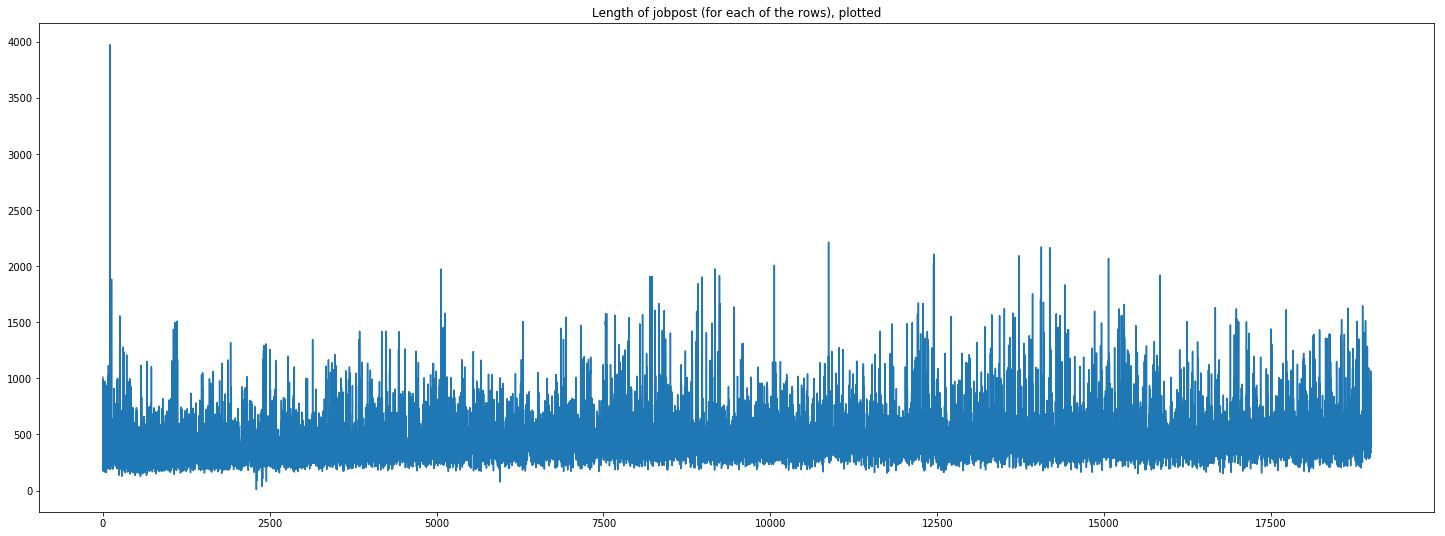

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 9))
plt.plot(df.jobpost_len)
plt.title('Length of jobpost (for each of the rows), plotted')

In [98]:
df['jobpost_token_uniq'] = df.jobpost_token.apply(set)

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [99]:
df['jobpost_token_uniq']

0        {your, seeking, 1, comprehensiveness, collabor...
1        {fill, ABOUT, in, be, part, communication, Com...
2        {ABOUT, Environmental, in, outreach, Oral, pub...
3        {fill, develop, in, social, be, support, provi...
4        {in, be, your, replication, 1, you, 18:00, Let...
5        {in, be, communication, For, Irina, your, you,...
6        {in, AF, be, For, your, seeking, Excel, 1, you...
7        {fill, develop, Programmatic, in, students, AB...
8        {in, be, your, 1, you, French, 18:00, Letters,...
9        {dependent, Listed, your, seeking, 1, position...
10       {in, amount, be, support, stg, For, historical...
11       {fill, develop, ABOUT, in, students, outreach,...
12       {ABOUT, develop, in, social, Tashkent, be, you...
13       {capacities, in, be, communication, your, seek...
14       {in, Promotes, be, ambitious, your, you, Manag...
15       {in, your, you, 18:00, Letters, Excellent, us,...
16       {ABOUT, in, win, social, essay, participation,.

Text(0.5,1,'Length of jobpost unique tokens (for each of the rows), plotted')

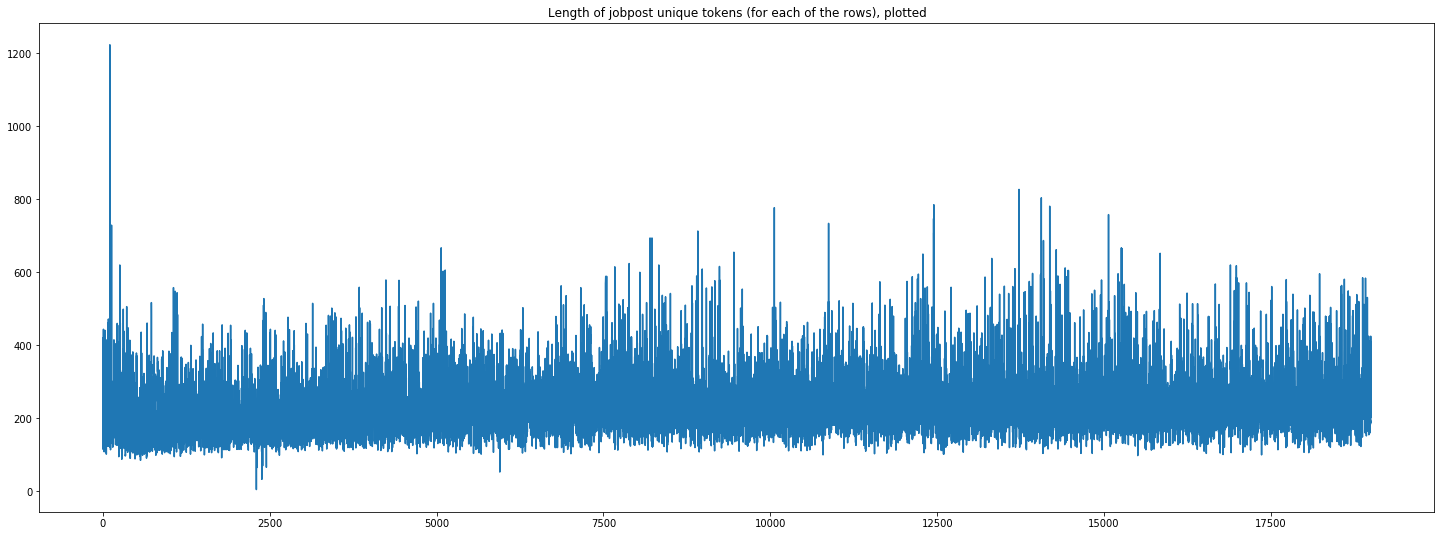

In [100]:
plt.figure(figsize=(25, 9))
plt.plot(df.jobpost_token_uniq.apply(len))
plt.title('Length of jobpost unique tokens (for each of the rows), plotted')

Text(0.5,1,'Avg. no. times each word is used (for each of the rows), plotted')

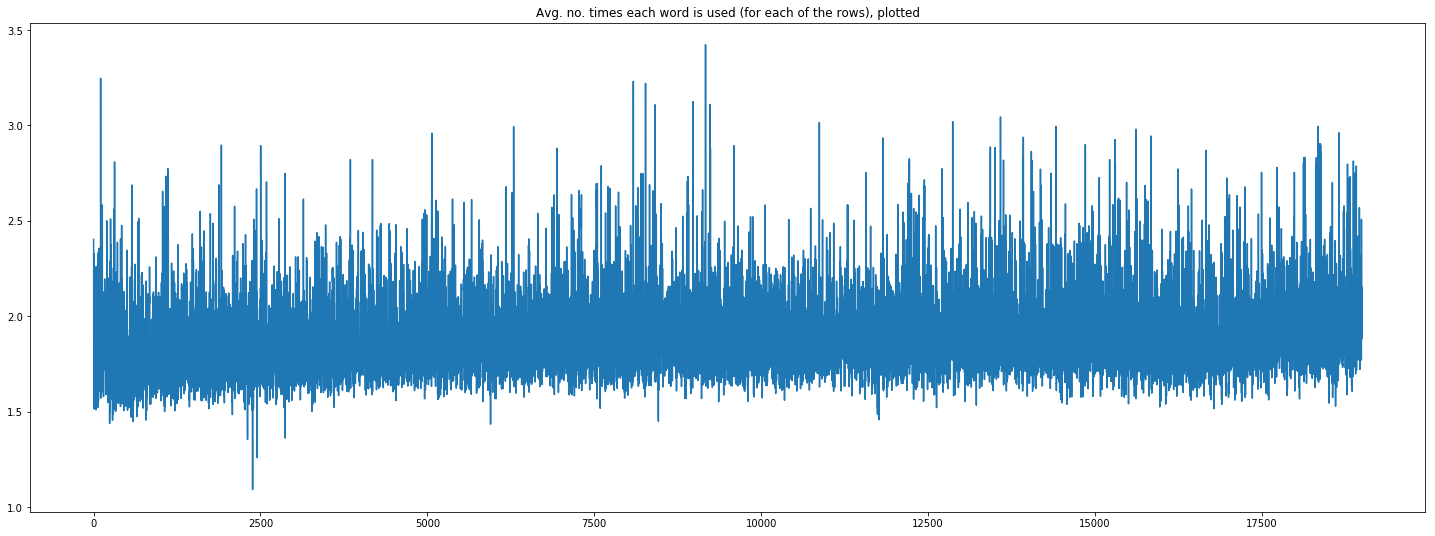

In [101]:
plt.figure(figsize=(25, 9))
plt.plot(df['jobpost_len']/df.jobpost_token_uniq.apply(len))
plt.title('Avg. no. times each word is used (for each of the rows), plotted')

So on average, each word is used 1.5 - 2.5 times in each job posting. 

## Try One Row First, if it works we can make it into a function and apply across the rows

In [102]:
tokens = (df.iloc[0])['jobpost_token']

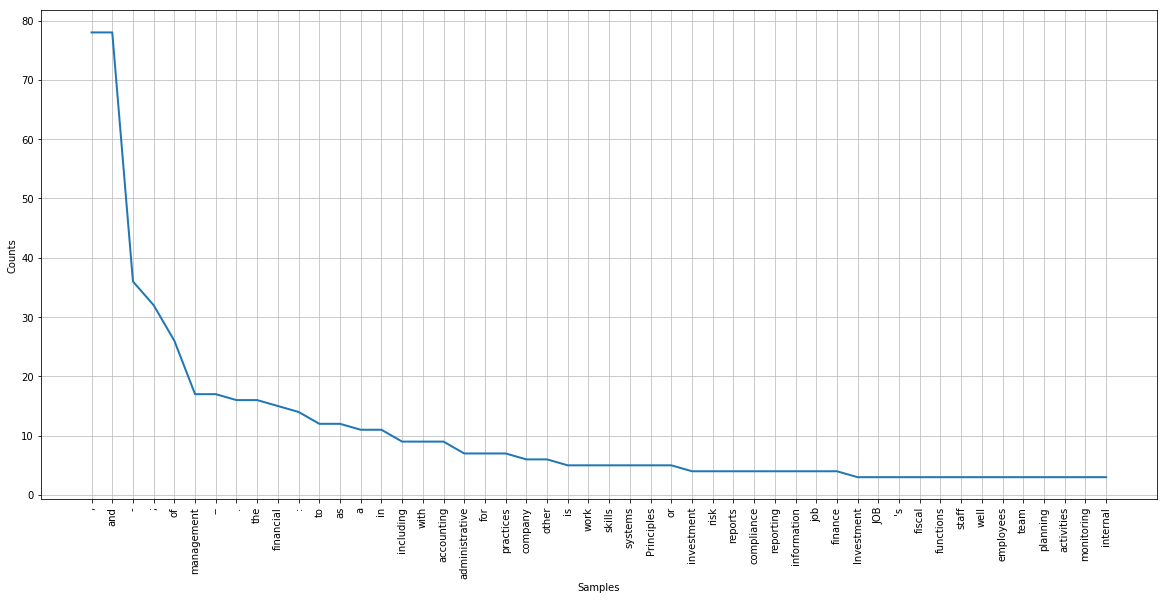

In [103]:
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens)  # case sensitive!
fd.most_common(50)
fd.plot(50)

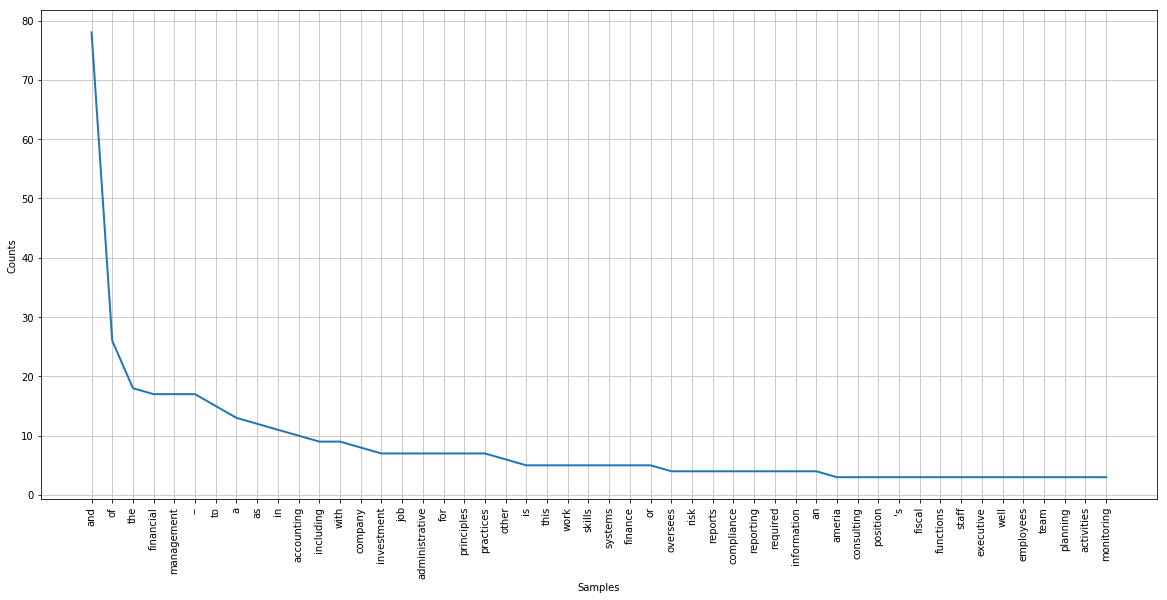

In [104]:
# Remove punctuations, convert all to lower-case, and try again
tokens_nop = [t for t in tokens if t not in string.punctuation]
tokens_nop = [t.lower() for t in tokens_nop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_nop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

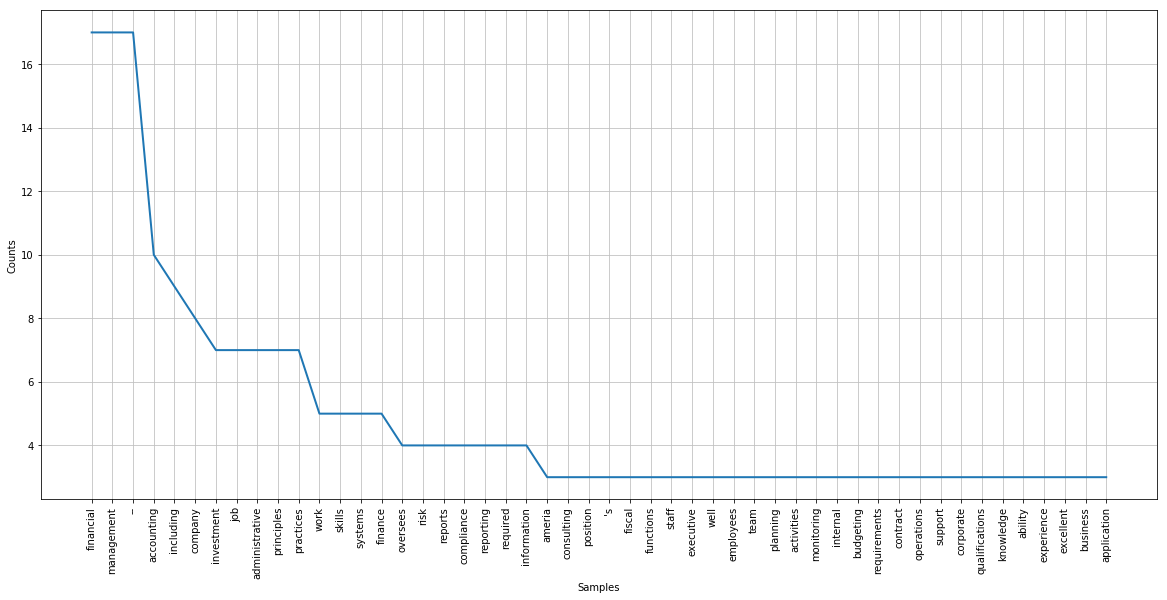

In [105]:
# Remove stopwords, and try again
stop = stopwords.words('english')
tokens_nostop = [t for t in tokens_nop if t not in stop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_nostop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

Tokens starting to have some meaning. What can we do with this? 
Job title is : 

In [106]:
print((df.iloc[0])['Title'])

Chief Financial Officer


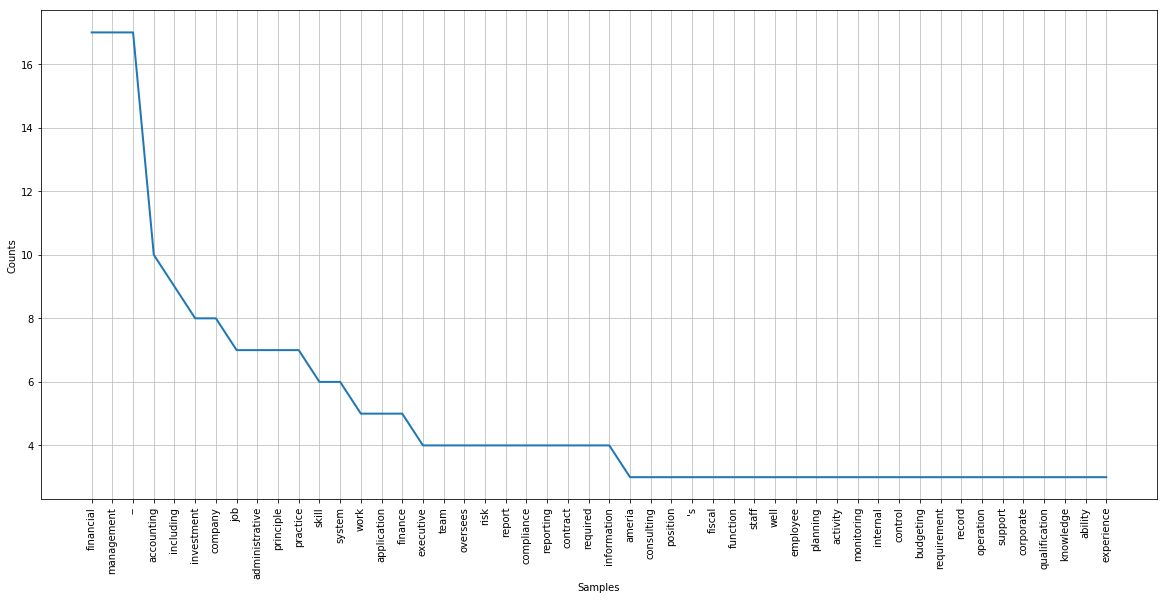

In [107]:
wnl = nltk.WordNetLemmatizer()
tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_lem)  # case sensitive!
fd.most_common(50)
fd.plot(50)

We see terms like executive and team after WordNet Lemmatizer. Seems to have a positive effect. Also, previous words like "investment", "skill", "system" have been "strengthened".

In [108]:
tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
text_clean = " ".join(tokens_clean)


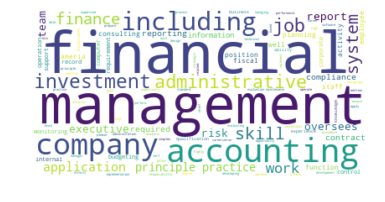

In [109]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wc = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Create a Preprocessing Function for All Rows

In [110]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_clean

def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  # case sensitive!
    fd.plot(50)

In [111]:
tokens_clean = preprocess((df.iloc[4])['jobpost_token'])
print(tokens_clean)

['yerevan', 'brandy', 'company', 'job', 'title', 'software', 'developer', 'position', 'location', 'yerevan', 'armenia', 'job', 'responsibility', 'rendering', 'technical', 'assistance', 'database', 'management', 'system', 'realization', 'sql', 'server', 'maintenance', 'activity', 'back-up', 'replication', 'participation', 'designing', 'software', 'development', 'project', 'required', 'qualification', 'university', 'degree', 'economical', 'background', 'plus', 'excellent', 'knowledge', 'window', '2000', 'server', 'networking', 'tcp/', 'technology', 'sql', '2000', 'server', 'visual', 'basic', 'least', 'year', 'experience', 'database', 'software', 'development', 'good', 'knowledge', 'english', 'remuneration', 'commensurate', 'norm', 'accepted', 'company', 'application', 'procedure', 'successful', 'candidate', 'submit', 'relevant', 'recommendation', 'letter', 'previous', 'employer', 'copy', '-ies', 'diploma', 'relevant', 'certificate', 'available', 'color', 'photo', '3x4', 'either', 'isakov

yerevan brandy company job title software developer position location yerevan armenia job responsibility rendering technical assistance database management system realization sql server maintenance activity back-up replication participation designing software development project required qualification university degree economical background plus excellent knowledge window 2000 server networking tcp/ technology sql 2000 server visual basic least year experience database software development good knowledge english remuneration commensurate norm accepted company application procedure successful candidate submit relevant recommendation letter previous employer copy -ies diploma relevant certificate available color photo 3x4 either isakov avenue 375082 yerevan send following fax 587 713 e-mail armine.bibilyan ... human resource department armine bibilyan please clearly mention application letter learned job opportunity career center mention url website www.careercenter.am thanks application

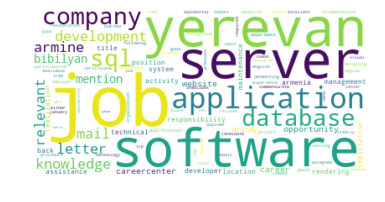

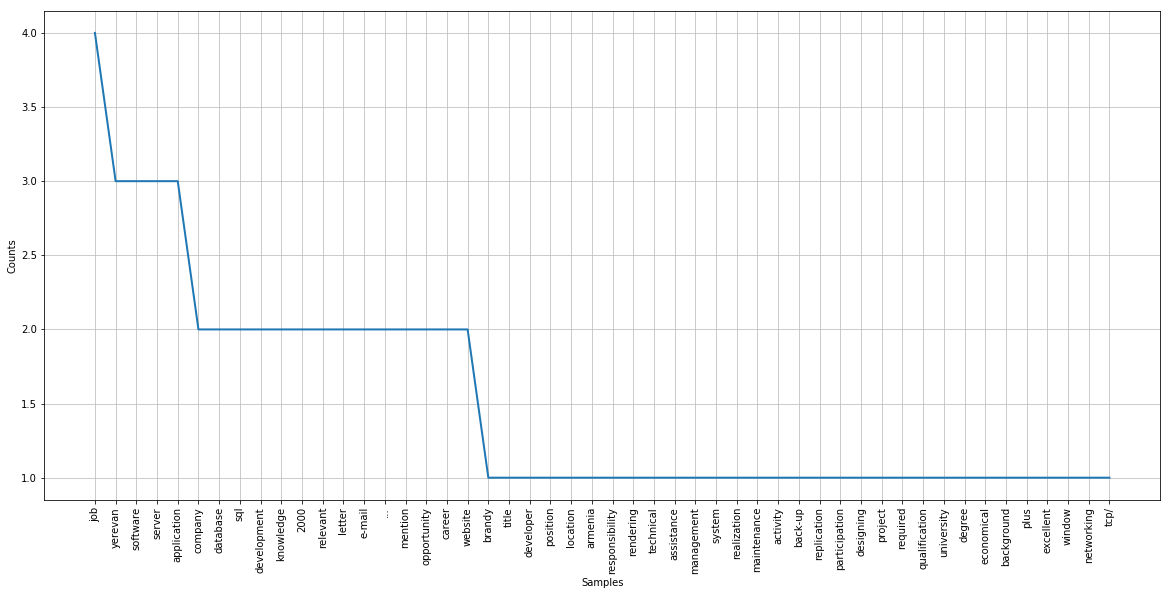

In [112]:
plotWC(tokens_clean)

In [113]:
df['jobpost_processed'] = df.jobpost_token.apply(preprocess)

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
print(df['jobpost_processed'])

0        [ameria, investment, consulting, company, job,...
1        [international, research, exchange, board, ire...
2        [caucasus, environmental, ngo, network, cenn, ...
3        [manoff, group, job, title, bcc, specialist, p...
4        [yerevan, brandy, company, job, title, softwar...
5        [boutique, appollo, job, title, saleswoman, po...
6        [osi, assistance, foundation, armenian, branch...
7        [international, research, exchange, board, ire...
8        [yerevan, brandy, company, job, title, assista...
9        [american, embassy, yerevan, announcement, num...
10       [international, research, exchange, board, ire...
11       [international, research, exchange, board, ire...
12       [institute, sustainable, community, isc, job, ...
13       [food, security, regional, cooperation, stabil...
14       [teleplus, llc, job, title, general, manager, ...
15       [netcall, communication, job, title, network, ...
16       [soc.stockholm, title, utopian, world, champio.

## Get Feature Matrix

In [115]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    
df['jobpost_processedtext'] = df.jobpost_processed.apply(lambda x: ' '.join(x))

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [116]:
vec_tf = CountVectorizer()
grain_tf = vec_tf.fit_transform(df['jobpost_processedtext'])
print(grain_tf.shape)

vec_tf = CountVectorizer(min_df=2)
grain_tf = vec_tf.fit_transform(df['jobpost_processedtext'])
print(grain_tf.shape)


(18892, 30122)
(18892, 18176)


In [117]:
print(grain_tf.toarray())
print(vec_tf.get_feature_names())

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
['00', '000', '0001', '0002', '00035799', '00051202', '00064044', '0009', '000amd', '001', '0010', '0011', '0012', '0014', '0015', '0018', '0019', '002', '0025', '0026', '003', '0032', '0033', '0037', '0037410', '004', '0043', '005', '0052', '0053', '006', '0068', '007', '0070', '0078', '008', '0082', '009', '00pm', '01', '010', '0102', '0105', '0108', '011', '011018', '012', '013', '014', '015', '016', '0162', '017', '0179', '018', '019', '02', '020', '0207', '021', '02142012', '023', '0231', '024', '025', '03', '030', '0301', '031', '031113', '0312', '0313', '032', '038', '04', '0405', '041', '046', '048', '05', '051', '0514', '055', '0597', '05_applicationform', '06', '060', '0613', '063', '07', '07vsct', '08', '081910', '089928', '09', '090', '091', '091013_dip_arm', '091911414', '093', '094', '095', '096', '098', '099', '0x5mgt', '10', '100', '1000', '100

In [141]:
vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
grain_tfidf = vec_tfidf.fit_transform(df['jobpost_processedtext'])
print(grain_tfidf.shape)

(18892, 14461)


In [142]:
 # To save the vectorized results for future use
import pickle

pickle.dump(grain_tfidf, open("tfidf.pkl", "wb"))
pickle.dump(vec_tfidf.vocabulary_, open("feature.pkl", "wb"))


In [143]:
# load the content
# loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=pickle.load(open("feature.pkl", "rb")))
# tfidf = pickle.load(open("./tfidf.pkl", "rb"))
# print(tfidf)

## Clustering Try 

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Use SVD to reduce dimensions
svd = TruncatedSVD(2000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(grain_tfidf)

In [145]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 84%


In [146]:
from sklearn.cluster import KMeans
from sklearn import metrics
num_clusters = 7

for num in [num_clusters]:
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))

CPU times: user 4.79 s, sys: 602 ms, total: 5.4 s
Wall time: 4.61 s
Clusters: 7
Silhouette Coefficient for clusters: 0.018


In [147]:
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km3, num_clusters)


Cluster 0: accounting financial accountant tax finance report chief prepare account armenian
Cluster 1: armenian ability russian excellent office system term llc good position
Cluster 2: bank credit banking loan form financial cjsc branch customer attachment
Cluster 3: software developer development web net design java team technology technical
Cluster 4: sale marketing customer product market manager service business llc client
Cluster 5: project program development management international community implementation training activity child
Cluster 6: test testing software synopsys design engineer mentor automation development graphic


Any pattern here between the clusters? 